# **EV Market Segmentation**

## Importing libraries

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Formatting

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Loading datasets

In [ ]:
ev_state_data = pd.read_csv("ev-statewise-dist.csv", index_col=0)
ev_chg_stn_data = pd.read_csv("ev-charging-stn.csv")
buying_bhvr_data = pd.read_csv("buying-bhvr.csv")

In [ ]:
ev_state_data.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,Andaman and Nicobar Island,1,30.00,81,0.00,40.00,0.00,0.00,0.00,7.00,159,NaN
1,Arunachal Pradesh,14,0.00,5,0.00,0.00,0.00,0.00,0.00,1.00,20,NaN
2,Assam,721,"47,041.00",161,7.00,15.00,0.00,0.00,0.00,2.00,47947,10.00
3,Bihar,5003,"59,079.00",114,11.00,26.00,0.00,0.00,0.00,8.00,64241,9.00
4,Chandigarh,298,"1,410.00",182,0.00,40.00,0.00,0.00,0.00,1.00,1931,2.00


In [ ]:
ev_chg_stn_data.head()

,name,state,city,address,latitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.98,12.00
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.08,12.00
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.28,12.00
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.72,12.00
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.72,12.00


In [ ]:
buying_bhvr_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


## Data Cleaning

In [ ]:
ev_state_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      32 non-null     object 
 1   Two Wheeler                     32 non-null     int64  
 2   Three Wheeler                   32 non-null     float64
 3   Four Wheeler                    32 non-null     int64  
 4   Goods Vehicles                  32 non-null     float64
 5   Public Service Vehicle          32 non-null     float64
 6   Special Category Vehicles       32 non-null     float64
 7   Ambulance/Hearses               32 non-null     float64
 8   Construction Equipment Vehicle  32 non-null     float64
 9   Other                           32 non-null     float64
 10  Grand Total                     32 non-null     int64  
 11  total-charging-stations         24 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory u

In [ ]:
ev_chg_stn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   latitude   1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [ ]:
buying_bhvr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [ ]:
print(f'Any duplicates? {ev_state_data.duplicated().values.any()}')

Any duplicates? False


In [ ]:
print(f'Any duplicates? {ev_chg_stn_data.duplicated().values.any()}')

Any duplicates? True


In [ ]:
print(f'Any duplicates? {buying_bhvr_data.duplicated().values.any()}')

Any duplicates? False


In [93]:
chg_stn_clean = ev_chg_stn_data.drop_duplicates(subset=['latitude', "longitude"])

# converting str to title case
chg_stn_clean["state"] = chg_stn_clean["state"].str.title()
chg_stn_clean["city"] = chg_stn_clean["city"].str.title()

# replacing
rep_place = {"Bengaluru" : "Bangalore", "Uttarkhand" : "Uttrakhand", "Uttarakhand" : "Uttrakhand", "Uttrakhand" : "Uttrakhand", "Taminadu" : "Tamilnadu", "Hyderabadu00A0" : "Hyderabad", "Harayana" : "Haryana", "Andhrapradesh" : "Andhra Pradesh", "Jammu And Kashmir" : "Jammu & Kashmir", "Karala" : "Kerala"}
chg_stn_clean = chg_stn_clean.replace(rep_place)

In [82]:
chg_stn_clean.head()

,name,state,city,address,latitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.98,12.00
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.08,12.00
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.28,12.00
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.72,12.00
5,Krishna Hansraj Hotel Una DC charging station,Himachal Pradesh,Una,"Old Hoshiarpur Rd, Una, Himachal Pradesh 174303",31.4668,76.26,12.00


In [ ]:
chg_stn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1203 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1203 non-null   object 
 1   state      1203 non-null   object 
 2   city       1203 non-null   object 
 3   address    1165 non-null   object 
 4   latitude   1202 non-null   object 
 5   longitude  1202 non-null   float64
 6   type       1195 non-null   float64
dtypes: float64(2), object(5)
memory usage: 75.2+ KB


## Descriptive Statistics

In [ ]:
ev_state_data.describe()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,24.00
mean,"8,829.44","20,224.56",822.97,94.88,63.72,12.81,0.19,12.41,137.88,"30,198.84",57.67
std,"15,027.42","49,311.80","1,661.50",287.60,161.50,60.76,0.47,65.05,377.12,"54,220.86",69.80
min,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00
25%,68.50,31.50,13.75,1.75,0.75,0.00,0.00,0.00,1.00,"1,323.00",7.75
50%,"1,984.50","1,992.00",131.50,10.00,12.50,0.00,0.00,0.00,11.00,"11,156.50",25.00
75%,"10,306.50","17,007.25",638.50,31.25,40.00,1.00,0.00,0.00,58.00,"45,205.00",80.25
max,"56,737.00","257,159.00","7,212.00","1,281.00",851.00,344.00,2.00,368.00,"1,602.00","276,217.00",265.00


In [ ]:
buying_bhvr_data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.00,99.00,99.00,99.00,99.00,99.00
mean,36.31,2.18,"1,736,363.64","534,343.43","2,270,707.07","1,194,040.40"
std,6.25,1.34,"673,621.73","605,444.96","1,050,777.41","437,695.54"
min,26.00,0.00,"200,000.00",0.00,"200,000.00","110,000.00"
25%,31.00,2.00,"1,300,000.00",0.00,"1,550,000.00","800,000.00"
50%,36.00,2.00,"1,600,000.00","500,000.00","2,100,000.00","1,200,000.00"
75%,41.00,3.00,"2,200,000.00","900,000.00","2,700,000.00","1,500,000.00"
max,51.00,4.00,"3,800,000.00","2,100,000.00","5,200,000.00","3,000,000.00"


## **Statewise EV Distribution**

In [ ]:
fig = px.pie(labels = ev_state_data["State Name"], values=ev_state_data["Grand Total"], title="Statewise Total EV Distribution", names=ev_state_data["State Name"], hole=0.4)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+percent")
fig.show()

### Statewise 2-wheeler EV Distribution

In [ ]:
fig = px.pie(labels = ev_state_data["State Name"], values=ev_state_data["Two Wheeler"], title="Statewise 2-wheeler EV Distribution", names=ev_state_data["State Name"], hole=0.5)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+percent")
fig.show()

### Statewise 3-wheeler EV distribution

In [ ]:
fig = px.pie(labels = ev_state_data["State Name"], values=ev_state_data["Three Wheeler"], title="Statewise 3-wheeler EV Distribution", names=ev_state_data["State Name"], hole=0.5)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+percent")
fig.show()

### Statewise 4-wheeler EV distribution

In [ ]:
fig = px.pie(labels = ev_state_data["State Name"], values=ev_state_data["Four Wheeler"], title="Statewise 4-wheeler EV Distribution", names=ev_state_data["State Name"], hole=0.5)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+percent")
fig.show()

### EV types distribution

In [ ]:
new_df = ev_state_data.drop(["State Name", 'Grand Total', 'total-charging-stations'], axis=1)
EV_types = [item for item in new_df.columns]
Total_EVs = [new_df[item].sum() for item in EV_types]

data = {"Total" : Total_EVs}

EV_df = pd.DataFrame(data, index=EV_types)
EV_df

,Total
Two Wheeler,"282,542.00"
Three Wheeler,"647,186.00"
Four Wheeler,"26,335.00"
Goods Vehicles,"3,036.00"
Public Service Vehicle,"2,039.00"
Special Category Vehicles,410.00
Ambulance/Hearses,6.00
Construction Equipment Vehicle,397.00
Other,"4,412.00"


In [ ]:
fig = px.pie(labels = EV_df.index, values=EV_df["Total"], title="Types of EV", names=EV_df.index)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+percent")
fig.show()

In [ ]:
v_bar = px.bar(
            x = EV_df.index,
            y = EV_df["Total"],
            color = EV_df["Total"],
            color_continuous_scale='Aggrnyl',
            title='EV Types distribution')

v_bar.update_layout(xaxis_title='EV Types',
                        coloraxis_showscale=True,
                        yaxis_title='Number of EVs (log)', yaxis=dict(type='log'), xaxis={'categoryorder':'total descending'})
v_bar.show()

## **EV charging station distribution**

In [ ]:
chg_stn_clean.head()

,name,state,city,address,latitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.98,12.00
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.08,12.00
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.28,12.00
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.72,12.00
5,Krishna Hansraj Hotel Una DC charging station,Himachal Pradesh,Una,"Old Hoshiarpur Rd, Una, Himachal Pradesh 174303",31.4668,76.26,12.00


### Statewise EV charging station distribution

In [94]:
stn_in_states = chg_stn_clean.state.value_counts()
stn_in_states.head()

state
Maharashtra      213
Delhi            123
Tamil Nadu       115
Karnataka        108
Uttar Pradesh     70
Name: count, dtype: int64

In [95]:
fig = px.pie(labels = stn_in_states.index, values=stn_in_states.values, title="Statewise EV Charging Stations Distribution", names=stn_in_states.index, hole=0.5)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+percent")
fig.show()

### Citywise EV charging station distribution

In [96]:
# chg_stn_clean.head()

stn_in_cities = chg_stn_clean.city.value_counts()
stn_in_cities.head()

city
Bangalore    93
New Delhi    70
Mumbai       60
Chennai      59
Delhi        57
Name: count, dtype: int64

In [97]:
fig = px.pie(labels = stn_in_cities.index, values=stn_in_cities.values, title="Citywise EV Charging Stations Distribution", names=stn_in_cities.index, hole=0.5)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+percent")
fig.show()

## **Indian consumers car buying behaviour**

In [ ]:
buying_bhvr_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
print(buying_bhvr_data[buying_bhvr_data["Wife Working"] == "m"])

    Age Profession Marrital Status Education  No of Dependents Personal loan  \
11   35   Salaried         Married  Graduate                 4           Yes   

   House Loan Wife Working   Salary  Wife Salary  Total Salary    Make   Price  
11        Yes            m  1400000            0       1400000  Baleno  700000  


In [ ]:
buying_bhvr_data = buying_bhvr_data.replace({"m" : "No"})
buying_bhvr_data.loc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

### Pair plot

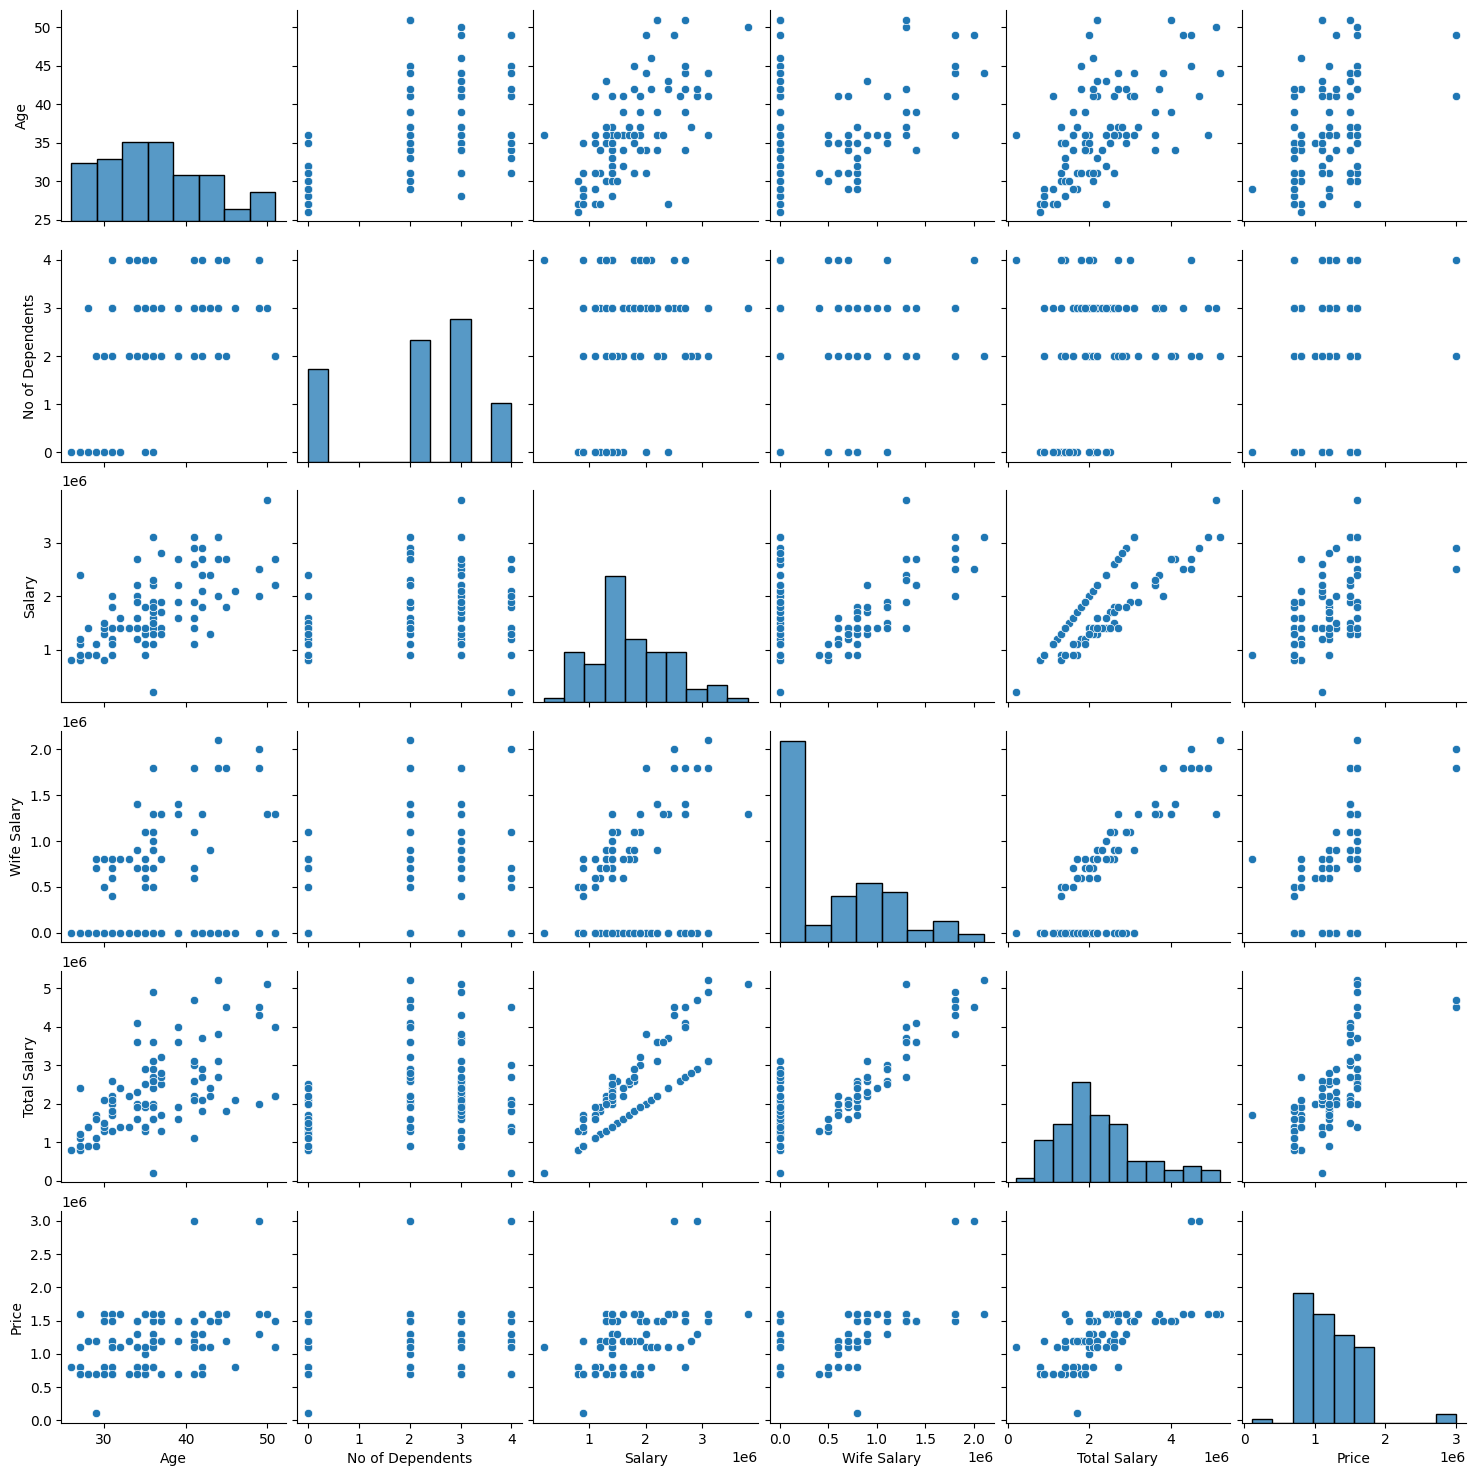

In [ ]:
sns.pairplot(buying_bhvr_data)
plt.show()

### Joint Plot between Age and Price of a car

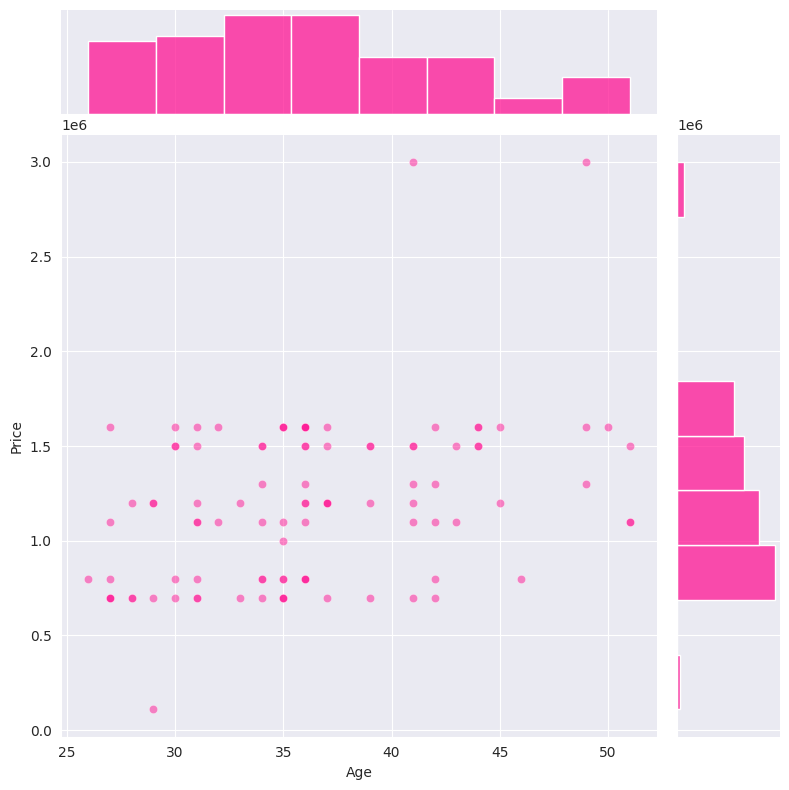

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=buying_bhvr_data['Age'],
                y=buying_bhvr_data['Price'],
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})

plt.show()

### Joint Plot between Total Salary and Price of a car

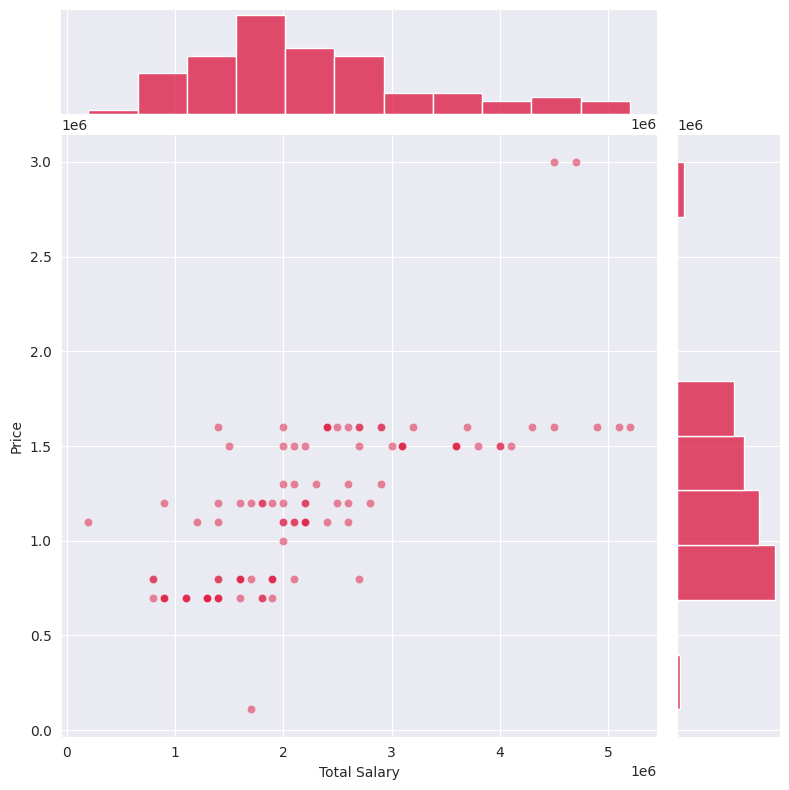

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=buying_bhvr_data['Total Salary'],
                y=buying_bhvr_data['Price'],
                height=8,
                kind='scatter',
                color='crimson',
                joint_kws={'alpha':0.5})

plt.show()

### Joint Plot between Age and Total Salary

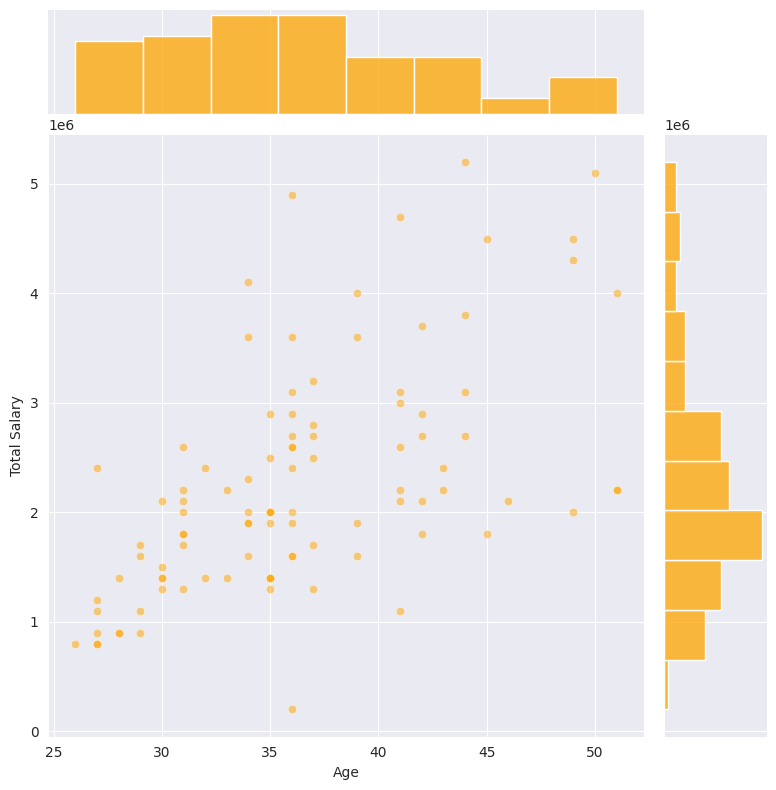

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=buying_bhvr_data['Age'],
                y=buying_bhvr_data['Total Salary'],
                height=8,
                kind='scatter',
                color='orange',
                joint_kws={'alpha':0.5})

plt.show()

### Relation between consumer's Total salary and Vehicle they tend to purchase

In [ ]:
g_bar = px.bar(buying_bhvr_data,
                   x='Price',
                   y='Total Salary',
                   title="Relation between consumer's Total salary and Vehicle they tend to purchase",
                   color='Make',
                   barmode='group')

g_bar.update_layout(xaxis_title='Price Range of Vehicles',
                        yaxis_title='total_Salary',
                        xaxis={'categoryorder':'total descending'},
                        # yaxis=dict(type='log')
)

g_bar.show()

### Relation between Marital status and the type of vehicle they tend to purchase

In [ ]:
g_bar = px.bar(buying_bhvr_data,
                   x='Make',
                   y='Age',
                   title='Relation between Marital status and the type of vehicle they tend to purchase',
                   color='Marrital Status',
                   barmode='group')

g_bar.update_layout(xaxis_title='Type of Vehicle',
                        yaxis_title='total_age',
                        xaxis={'categoryorder':'total descending'},
                        # yaxis=dict(type='log')
)

g_bar.show()

### Relation between number of dependents on a consumer and the vehicles they tend to purchase

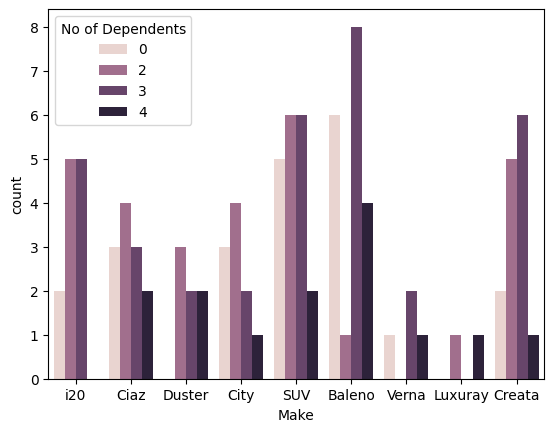

In [ ]:
sns.countplot(x="Make", data=buying_bhvr_data, hue="No of Dependents")
plt.show()

### Demographic Analysis

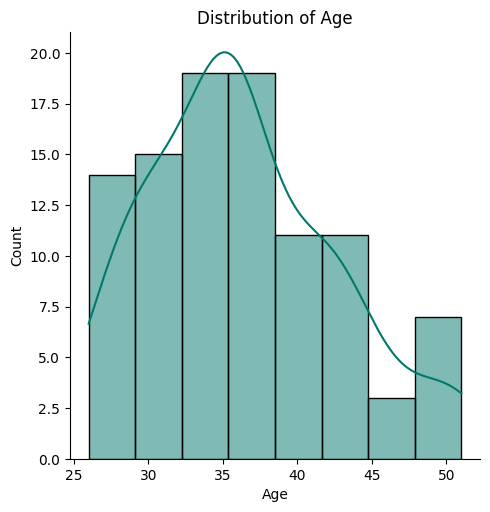

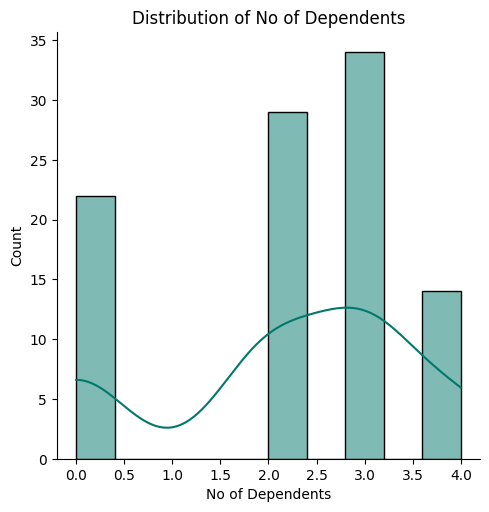

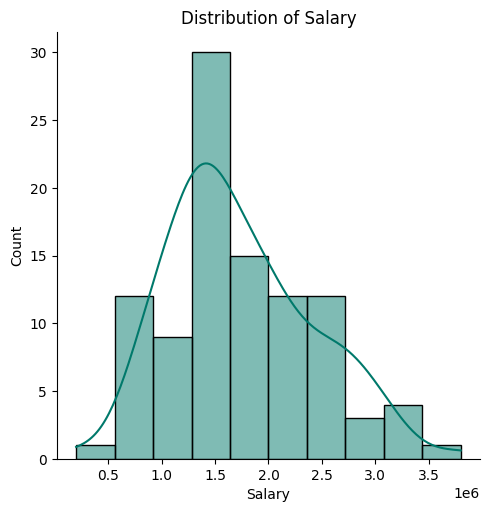

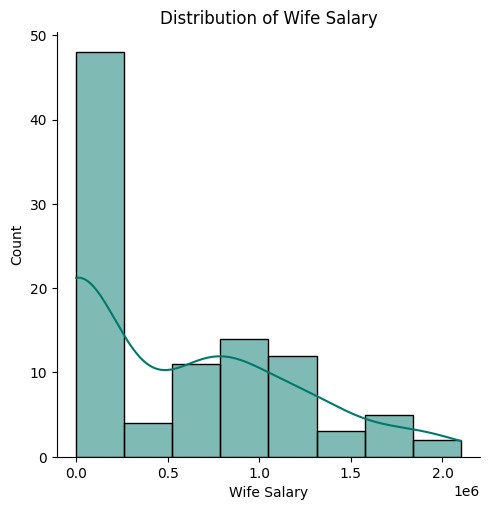

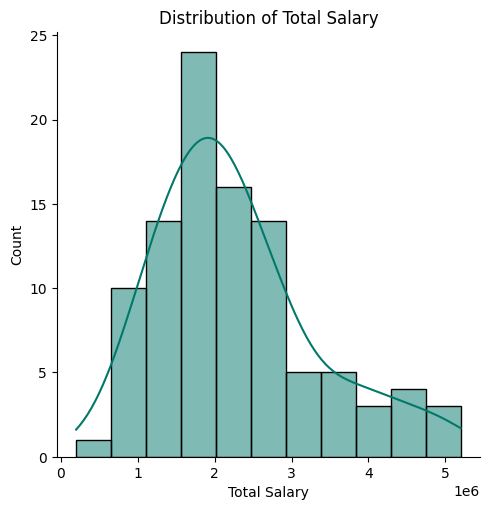

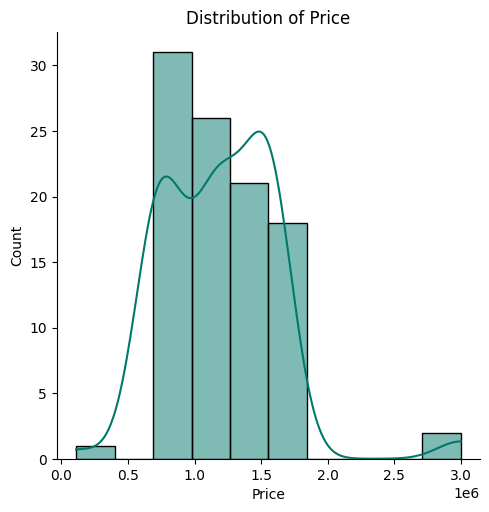

In [ ]:
for i in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  sns.displot(buying_bhvr_data[i],
            aspect=1,
            kde=True,
            color='#00796b')

  plt.title(f'Distribution of {i}')
  plt.xlabel(f'{i}')
  plt.ylabel('Count')

## K-Means Clustering

In [ ]:
new_buy_data = buying_bhvr_data.drop("Make", axis=1)
new_buy_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


### Encoding

In [ ]:
encoding = {"Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }

new_buy_data = new_buy_data.replace(encoding)
new_buy_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


### Scaling down data

In [ ]:
# scaling data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_buy_data)
scaled_data

array([[-1.4986304 , -0.73950997, -2.36643191, ..., -0.88705464,
        -1.40676   , -0.90484292],
       [-0.21130364, -0.73950997,  0.42257713, ...,  0.10899537,
        -0.25893659, -0.44557889],
       [ 1.39785482,  1.35224681,  0.42257713, ..., -0.88705464,
        -0.4502405 ,  0.01368514],
       ...,
       [ 2.36334989,  1.35224681,  0.42257713, ..., -0.88705464,
        -0.06763269, -0.21594688],
       [ 2.36334989, -0.73950997,  0.42257713, ...,  1.27105372,
         1.65410242,  0.70258119],
       [ 2.36334989, -0.73950997,  0.42257713, ..., -0.88705464,
        -0.06763269, -0.21594688]])

In [ ]:
scaled_labels = ["scaled_" + str(x) for x in new_buy_data.columns]
scaled_df = pd.DataFrame(scaled_data, columns=scaled_labels)
scaled_df.head()

,scaled_Age,scaled_Profession,scaled_Marrital Status,scaled_Education,scaled_No of Dependents,scaled_Personal loan,scaled_House Loan,scaled_Wife Working,scaled_Salary,scaled_Wife Salary,scaled_Total Salary,scaled_Price
0,-1.50,-0.74,-2.37,0.88,-1.64,1.45,-0.77,-1.05,-1.40,-0.89,-1.41,-0.90
1,-0.21,-0.74,0.42,0.88,-0.14,1.45,1.29,0.95,-0.50,0.11,-0.26,-0.45
2,1.40,1.35,0.42,-1.14,1.37,1.45,1.29,-1.05,0.09,-0.89,-0.45,0.01
3,0.75,1.35,0.42,0.88,0.62,-0.69,-0.77,0.95,-0.20,0.11,-0.07,0.01
4,-0.85,-0.74,0.42,0.88,-0.14,1.45,-0.77,0.95,0.09,0.44,0.31,0.93


### Optimization function to find optimum numbers of clusters

In [ ]:
# create function to work out optimum no. of clusters

def optimise_k_means(df_data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  # generate elbow plot
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, "o-")
  plt.xlabel("No. of Clusters")
  plt.ylabel("Inertias")
  plt.grid(True)
  plt.show()

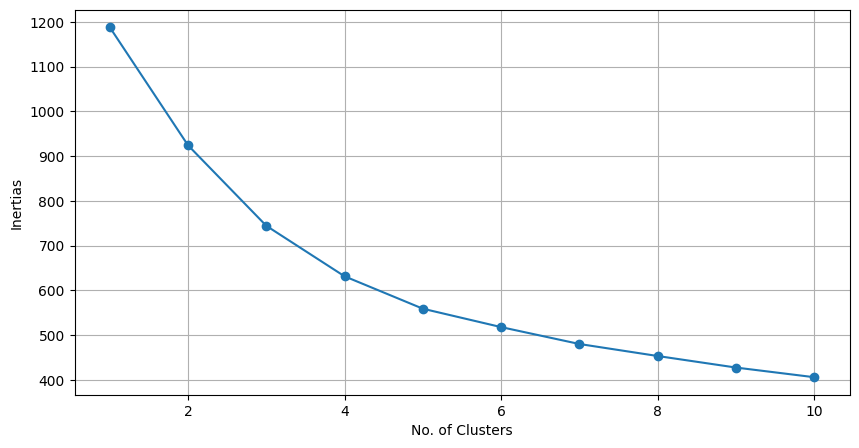

In [ ]:
optimise_k_means(scaled_df, 11)

### Applying K-Means clustering

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [ ]:
k_mean_df = buying_bhvr_data
k_mean_df["kmeans_3"] = kmeans.labels_

k_mean_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,kmeans_3
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,2


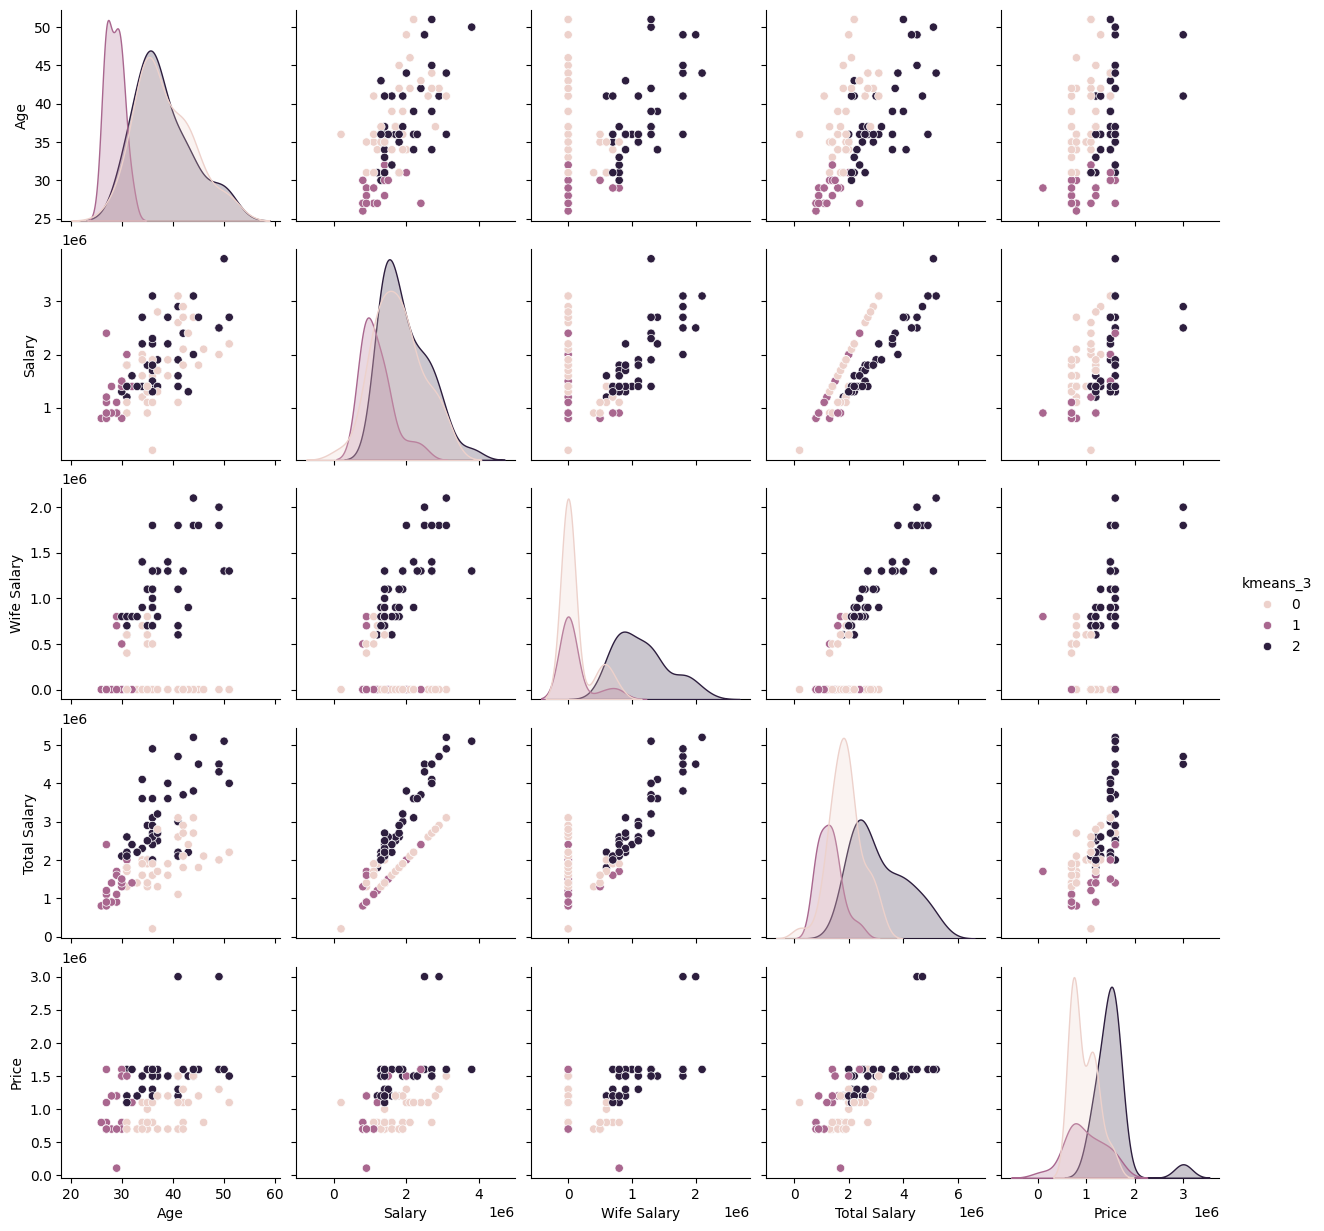

In [ ]:
sns.pairplot(k_mean_df,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='kmeans_3')
plt.show()